# In Class Activity - Visualizing Data with Matplotlib and Seaborn

```{note}
This exercise authored by [Mark K Ho](https://markkho.github.io/) is released under the [license](/LICENSE.html). 
```

This lab focuses on creating plots using Matplotlib and Seaborn. [Matplotlib](https://matplotlib.org/) is a general purpose library for creating various kinds of visualizations in Python, including static, animated, and even interactive plots. [Seaborn](https://seaborn.pydata.org/) is a Python library that provides utilities for plotting and visualizing data and uses Matplotlib under the hood. For most purposes, seaborn is sufficient, but when we need more detailed control over our plots, we will turn to Matplotlib.


As usual, we will start by importing the packages we will be using for this lab.

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Basic matplotlib functionality

In cognitive science, like in other sciences, we care about the relationships
between at least two variables. For example, we may ask questions like: 
- How does a person's mood change as a function of time of day? 
- How does the temperature change as a function of sunlight? 
- How does the perceived color of an object change as a function of the color of its
background? 
These are all questions about how one variable changes as another one
changes.

Thus, one of the simplest kinds of visualizations involves plotting 
the relationships between two variables. Lets call one variable (the independent variable)
$x$ and the other variable (the dependent variable) $y$. Matplotlib provides
straightforward functionality for plotting the relationship between two variables
by using the `plt.plot` function, as shown in the next cell.

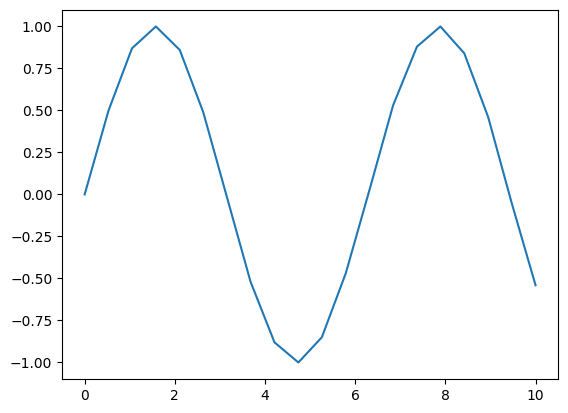

In [2]:
xs = [0.0, 0.53, 1.05, 1.58, 2.11, 2.63, 3.16, 3.68, 4.21, 4.74, 5.26, 5.79, 6.32, 6.84, 7.37, 7.89, 8.42, 8.95, 9.47, 10.0]
ys = [0.0, 0.5, 0.87, 1.0, 0.86, 0.49, -0.02, -0.52, -0.88, -1.0, -0.85, -0.47, 0.03, 0.53, 0.88, 1.0, 0.84, 0.46, -0.05, -0.54]
plt.plot(xs, ys)

The simplest way to use the `plt.plot` function is to provide it with
two arguments corresponding to the x and y coordinates of different points.
By default, it creates a plot in which these points are connected by a blue line,
but we can change this formatting by passing in a format string that specifies the
color and style of the plot as a third argument.

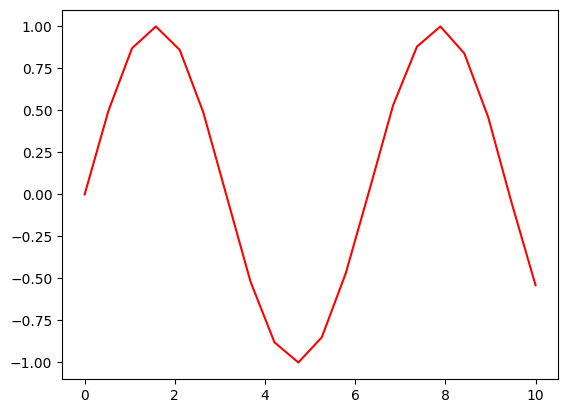

In [3]:
plt.plot(xs, ys, 'r') # red line

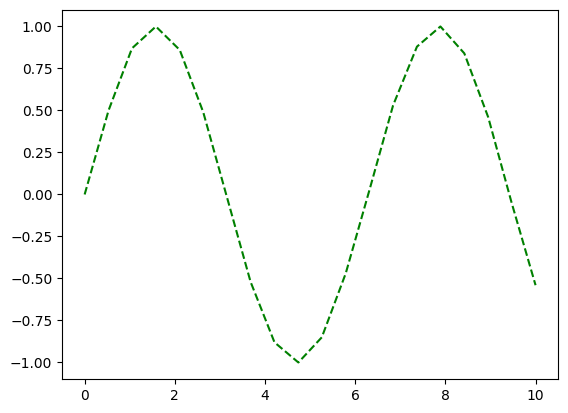

In [4]:
plt.plot(xs, ys, 'g--') # green dashed line

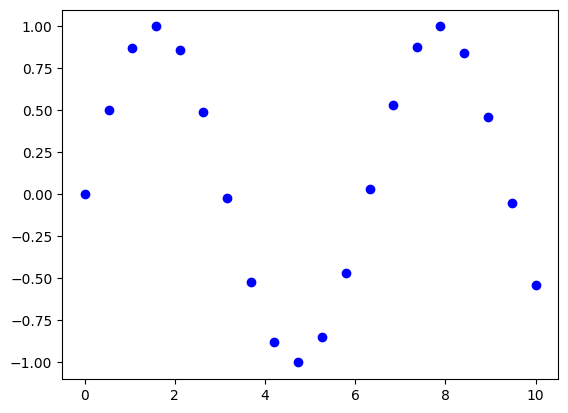

In [5]:
plt.plot(xs, ys, 'bo') # blue circles

<div class="alert alert-info">
<b>Test your understanding</b>: The previous example generated plots that looked 
like a sine wave and is most naturally plotted as a line. 
But not all data makes sense as a line! Can you think of examples of data 
that would be better shown as a <b>scatter plot</b> rather than a <b>line plot</b>?
What kinds of data are most naturally shown with a line?
</div>

## Basic seaborn functionality

Matplotlib is a powerful, flexible library that gives you fine-grained control 
over every detail of your plots. However, making plots look polished often 
requires writing a lot of extra code (choosing colors, adjusting labels, 
formatting styles). Seaborn is built on top of Matplotlib and is designed to 
make statistical data visualization easier and more attractive out of the box.

In the next few cells, we will look at how to plot lineplots and scatterplots
using seaborn instead of matplotlib directly.

<Axes: >

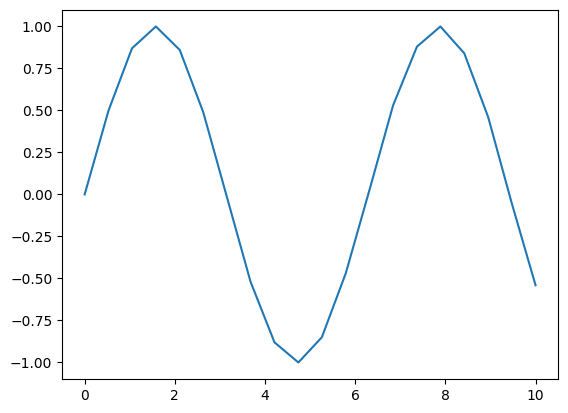

In [6]:
sns.lineplot(x=xs, y=ys)

<Axes: >

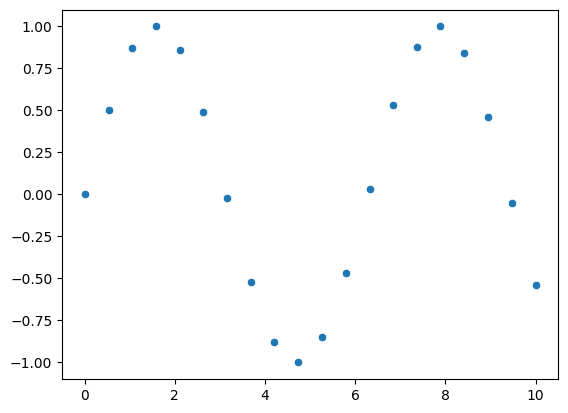

In [7]:
sns.scatterplot(x=xs, y=ys)

In the previous cells, we recreated the same plots using seaborn that we 
created with matplotlib, but the real power of seaborn comes from how it
interacts with pandas dataframes. In the next cell, we are going to
create a pandas dataframe from our x and y data, but label them
as corresponding to, say, time of day and alertness. Then we are going to 
re-plot them.

In [8]:
df = pd.DataFrame({'time_of_day': xs, 'alertness': ys})

<Axes: xlabel='time_of_day', ylabel='alertness'>

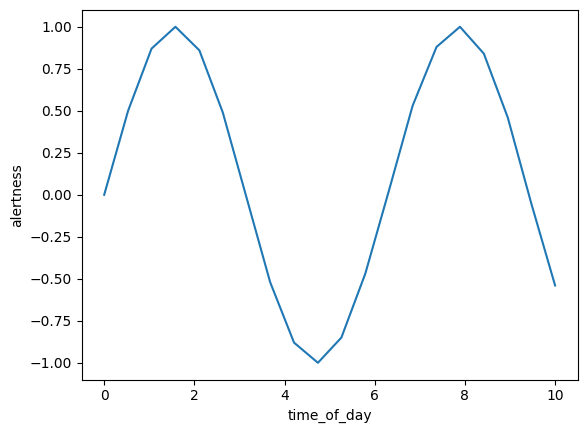

In [9]:
sns.lineplot(data=df, x='time_of_day', y='alertness')

<Axes: xlabel='time_of_day', ylabel='alertness'>

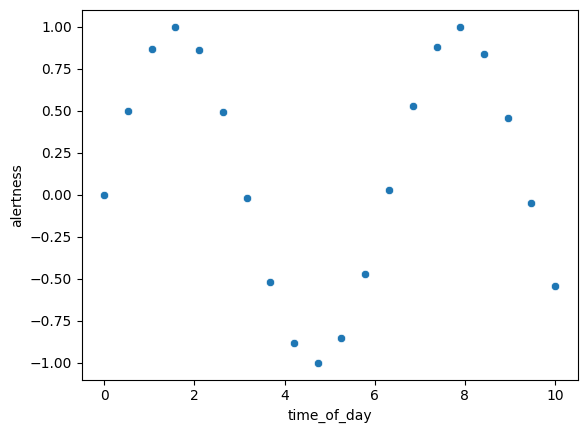

In [10]:
sns.scatterplot(data=df, x='time_of_day', y='alertness')

<div class="alert alert-info">
<b>Test your understanding</b>: In the previous cells, we passed in a
DataFrame with labeled columns (`time_of_day` and `alertness`) rather than
raw x/y values and seaborn generated a simple plot with the appropriate
axis labels. One way to view seaborn is that it provides a "layer of abstraction" 
around matplotlib that interacts with pandas dataframes and makes it easier 
to create scientific plots. 

Knowing that many users work with pandas DataFrames, 
what are some other features or conveniences a library like seaborn could 
provide to make plotting even smoother? You can even take a look at the seaborn
[gallery](https://seaborn.pydata.org/examples/index.html) for inspiration.
</div>

## Grouping with Seaborn

In the next few cells, we will explore how Seaborn makes it easy to create plots based on grouping data. Grouping means splitting your dataset into subcategories (for example, by gender, treatment group, time period, or experimental condition) and then plotting those groups together in a single visualization.

Seaborn handles grouping very naturally because it understands categorical variables in a pandas DataFrame. Instead of manually filtering data and plotting one group at a time (as you would often need to do in raw Matplotlib), you can simply pass a column name to Seaborn’s hue, style, or size arguments, and it will automatically assign different colors, shapes, or line sizes bsed on groups.

In [11]:
# First, lets load the salary data into a pandas dataframe
df = pd.read_csv(
    "https://markkho.github.io/nyu_lab_in_cognition/data/salary.csv",
    sep=",",
    header="infer",
)

In [12]:
# We always want to quickly examine the data after loading it
df

,salary,gender,departm,years,age,publications
0,86285,0,bio,26.0,64.0,72
1,77125,0,bio,28.0,58.0,43
2,71922,0,bio,10.0,38.0,23
3,70499,0,bio,16.0,46.0,64
4,66624,0,bio,11.0,41.0,23
...,...,...,...,...,...,...
72,53662,1,neuro,1.0,31.0,3
73,57185,1,stat,9.0,39.0,7
74,52254,1,stat,2.0,32.0,9
75,61885,1,math,23.0,60.0,9


<Axes: xlabel='age', ylabel='salary'>

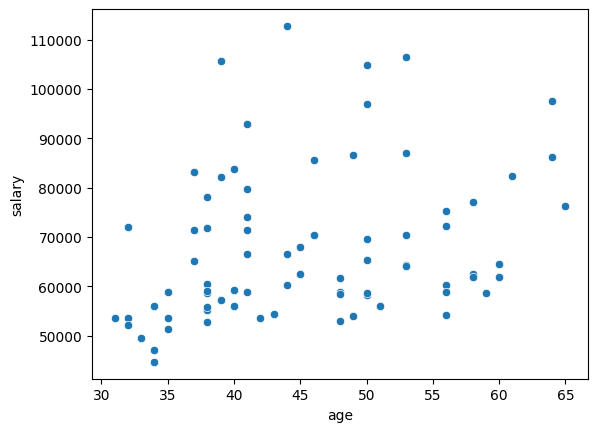

In [13]:
# To start, let's create a simple scatterplot of age vs. salary
sns.scatterplot(data=df, x="age", y="salary")

<Axes: xlabel='age', ylabel='salary'>

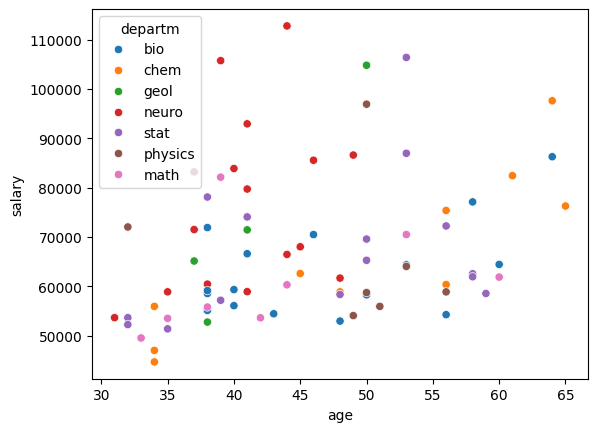

In [14]:
# Now, let's add a grouping variable to see how age and salary varies by department
sns.scatterplot(data=df, x="age", y="salary", hue='departm')

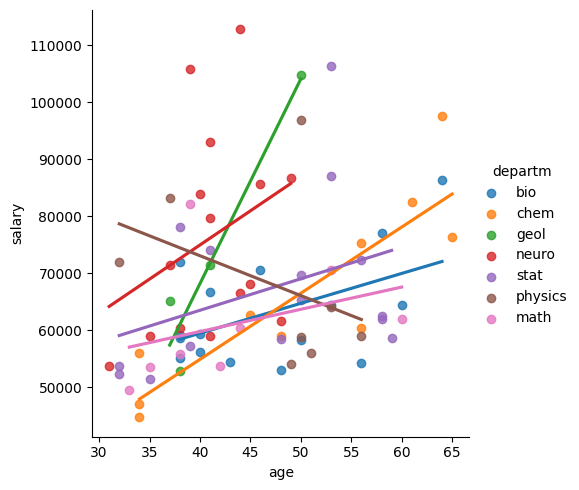

In [15]:
# Here, we use lmplot to add regression lines for each department
# The ci=None argument removes the confidence interval shading around each line
sns.lmplot(data=df, x="age", y="salary", hue='departm', ci=None)

<div class="alert alert-info">
<b>Test your understanding</b>

Seaborn has additional functions for
plotting data besides scatterplot, for instance, we earlier used `sns.lineplot`.
What happens if you try to plot the age/salary data with `sns.lineplot`? 
Try plotting the data using
[sns.boxplot()](https://seaborn.pydata.org/generated/seaborn.boxplot.html) 
and [sns.violinplot()](https://seaborn.pydata.org/generated/seaborn.violinplot.html)
where the x axis is department and y axis is salary or publications. 
What do you find? Which of these ways of visualizing the data is best?
</div>

In [16]:
# your code should go here 